# Признаковое описание, переобучение и кросс-валидация

In [511]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

(30,)

(30, 4)

(-10.0, 10.0)

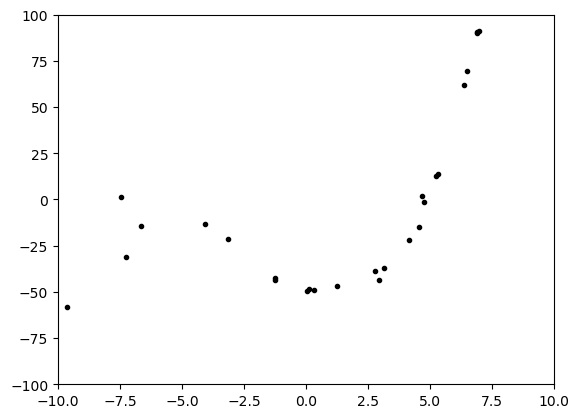

In [600]:
def generate_data (sample_size = 40):
    #true_theta = [0, -2.5, -1.9, -0.019, 0.021]; true_degee = 4 
    true_theta = [-50, -4, 1.9, 0.25]; true_degee = 3 

    X = np.random.rand(sample_size) * 20 - 10#*sample_size - sample_size/2#np.arange(0, sample_size) - sample_size/2 #+ np.random.randn(sample_size)
    #X = np.concatenate((np.random.rand(int(sample_size/2)) * -10 - 1, np.random.rand(int(sample_size/2)) * 10 + 1))#np.random.rand(int(sample_size/2)) * -10 - 1 np.random.rand(int(sample_size/2)) * 10 + 1

    poly = PolynomialFeatures(true_degee)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    display(X.shape)
    display(X_poly.shape)
    Y = np.dot(X_poly, true_theta) + np.random.randn(sample_size) * np.sqrt (np.abs(X)) * 2 + np.random.randn(sample_size) * 4
    return X, Y

X, Y = generate_data (30)

plt.figure()
plt.plot(X, Y, '.k')
plt.ylim([-100, 100])
plt.xlim([-10, 10])


In [523]:
class PolynomialRegression:
    def __init__(self, degree = 1):
        self.degree = degree
        self.regressor = LinearRegression()
    def fit(self, X, Y):
        self.poly = PolynomialFeatures(self.degree)
        X_poly = self.poly.fit_transform(X.reshape(-1, 1))
        self.regressor.fit(X_poly, Y)
    def predict(self, X):
        X_poly = self.poly.fit_transform(X.reshape(-1, 1))        
        return self.regressor.predict(X_poly)


RMSE =  2.152485480154351


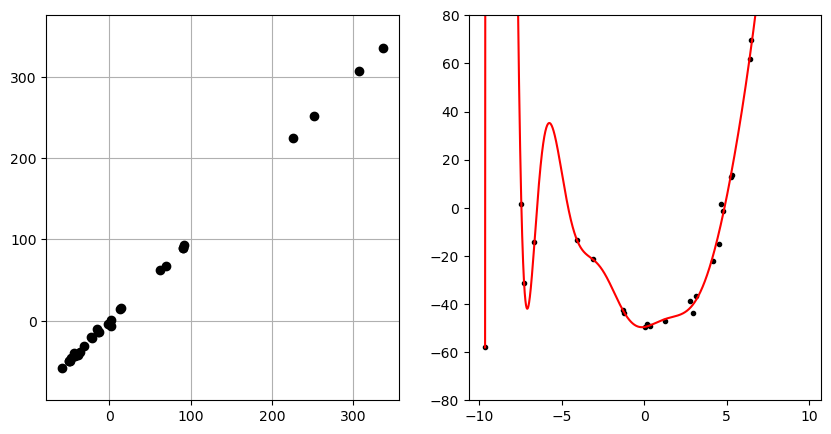

In [601]:

model = PolynomialRegression(15)
model.fit(X, Y)

Y_predicted = model.predict(X)
rmse = np.sqrt(mean_squared_error(Y, Y_predicted))
print ('RMSE = ', rmse)
X2draw = np.linspace(X.min(), X.max(), 10000)
Y2draw = model.predict(X2draw)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot (Y, Y_predicted, 'ok')
plt.axis('equal')
plt.grid()

plt.subplot(1,2,2)
plt.plot(X, Y, '.k')
plt.ylim([-80, 80])
plt.plot(X2draw, Y2draw, '-r')



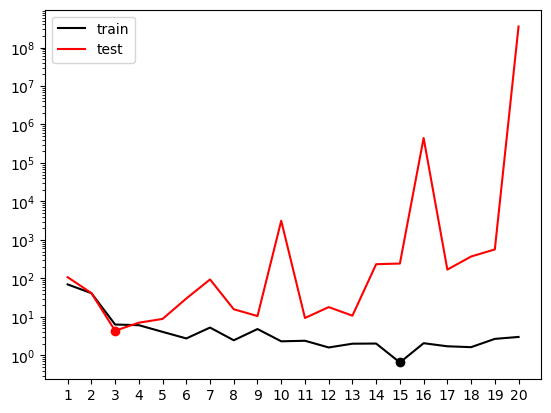

In [637]:

rmse_test = []
rmse_train = []

degrees = range(1, 21)

for degree in degrees:
    model = PolynomialRegression(degree)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    model.fit(x_train, y_train)
    y_test_predicted = model.predict(x_test)
    y_train_predicted = model.predict(x_train)
    
    rmse_test.append (np.sqrt(mean_squared_error(y_test, y_test_predicted)))
    rmse_train.append (np.sqrt(mean_squared_error(y_train, y_train_predicted)))

best_idx_test  = np.argmin(rmse_test)
best_idx_train = np.argmin(rmse_train)


plt.plot (degrees, rmse_train, '-k', label = 'train')
plt.plot (degrees, rmse_test, '-r', label = 'test')
plt.plot (degrees[best_idx_train], rmse_train[best_idx_train], 'ok')
plt.plot (degrees[best_idx_test], rmse_test[best_idx_test], 'or')
plt.legend()

plt.yscale('log')
_ = plt.xticks(degrees)